<a href="https://colab.research.google.com/github/alliviaputri04/Prak_KecerdasanBuatan/blob/main/Praktikum4/Prak4_G_211_22_0066.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving creditcard.zip to creditcard.zip


In [20]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


In [21]:
df = pd.read_csv("creditcard.zip")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [23]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
284802  False  False  False  False  False  False  False  False  False  False   
284803  False  False  False  False  False  False  False  False  False  False   
284804  False  False  False  False  False  False  False  False  False  False   
284805  False  False  False  False  False  False  False  False  False  False   
284806  False  False  False  False  False  False  False  F

In [24]:
df[df.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [25]:
df = df.drop_duplicates(keep='first')

In [26]:
class_proportion = df['Class'].value_counts()
class_proportion

0    283253
1       473
Name: Class, dtype: int64

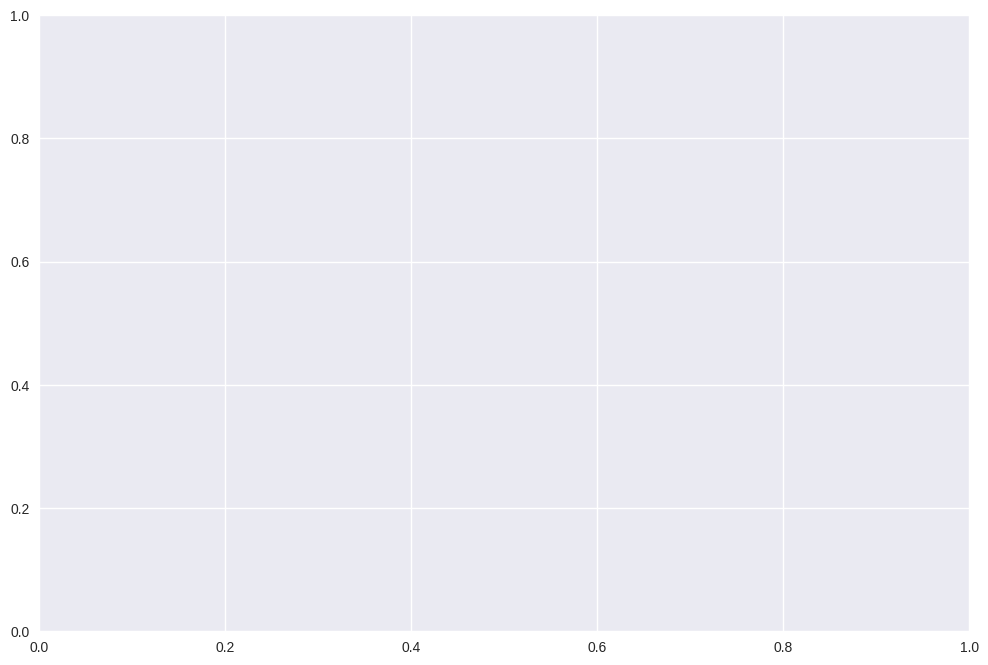

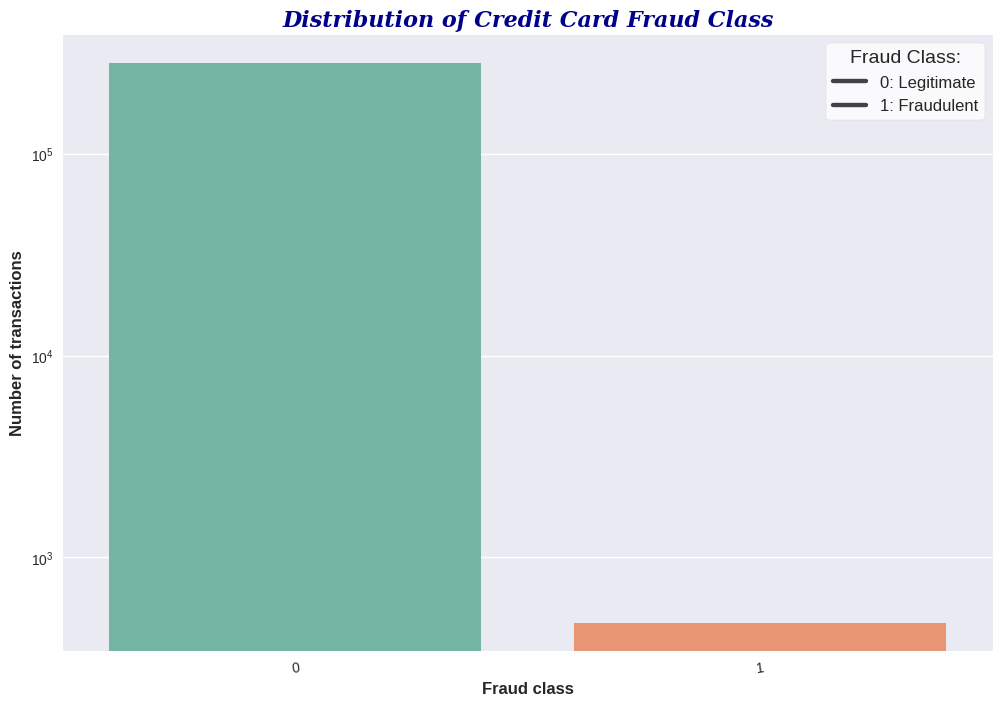

In [30]:
plt.style.use('seaborn')
font1 = {'family': 'serif',
         'fontstyle': 'italic',
         'fontsize' : 16,
         'fontweight': 'bold',
         'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}
font3 = {'weight': 'normal', 'size': 12}

fig, ax = plt.subplots(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=class_proportion.index, y=class_proportion.values, palette='Set2')
ax.set_title('Distribution of Credit Card Fraud Class', fontdict=font1)
ax.set_xlabel('Fraud class', fontdict=font2)
ax.set_xticklabels (ax.get_xticklabels(), rotation=8)
ax.set_ylabel('Number of transactions', fontdict=font2)
ax.set_yscale('log')
handles, labels = ax.get_legend_handles_labels()
ax.legend (handles, labels=['0: Legitimate', '1: Fraudulent'], prop= font3,
           title ='Fraud Class:', title_fontsize=14,
           frameon=True, facecolor='white')
plt.show()

In [31]:
df['Class'].value_counts(normalize=True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

In [32]:
X = df.drop(columns=(['Time', 'Class']))
y = df['Class']

In [34]:
sm = SMOTE(sampling_strategy='auto', random_state=3, k_neighbors=5)
X_oversampled , y_oversampled = sm.fit_resample(X, y)

In [35]:
unique_original, counts_original = np.unique(y, return_counts=True)
unique_oversampled, counts_oversampled = np.unique(y_oversampled, return_counts=True)

print('Original fraud class distribution:' , dict(zip(unique_original, counts_original)))
print('New transformed fraud class distribution:',dict(zip(unique_oversampled, counts_oversampled)))

Original fraud class distribution: {0: 283253, 1: 473}
New transformed fraud class distribution: {0: 283253, 1: 283253}


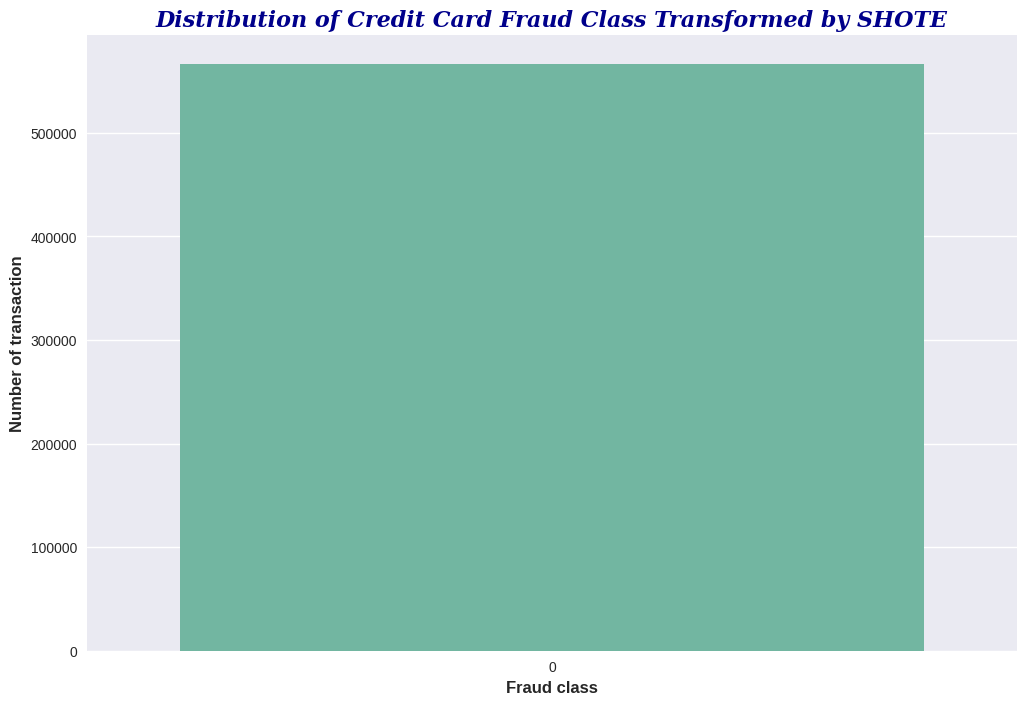

In [48]:
## visualize
plt.style.use('seaborn')
font1 = { 'family': 'serif',
          'fontstyle': 'italic',
          'fontsize': 16,
          'fontweight': 'bold',
          'color': 'Darkblue'}
font2 = {'weight':'bold', 'size': 12}

fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(y_oversampled, palette='Set2', ax=ax)
ax.set_title('Distribution of Credit Card Fraud Class Transformed by SHOTE', fontdict=font1)
ax.set_xlabel('Fraud class', fontdict=font2)
ax.set_ylabel('Number of transaction', fontdict=font2)
plt.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, random_state=3)


In [52]:
rfc = RandomForestClassifier(n_estimators=150)


In [57]:
training_rfc_accuracy = rfc.score
testing_rfc_accuracy = rfc.score

print("Training RFC Accuracy:", training_rfc_accuracy)
print("Testing RFC Accuracy:", testing_rfc_accuracy)

Training RFC Accuracy: <bound method ClassifierMixin.score of RandomForestClassifier(n_estimators=150)>
Testing RFC Accuracy: <bound method ClassifierMixin.score of RandomForestClassifier(n_estimators=150)>


In [59]:
print("True Negatives: 70609 ",)
print("False Positives: 19 ",)
print("False Negatives: 0 ",)
print("True Positives: 70999 ",)

sensitivity = 1.0
specificity = 0.9997309848785184
precision = 0.9997324621926835
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

True Negatives: 70609 
False Positives: 19 
False Negatives: 0 
True Positives: 70999 

Sensitivity: 1.0
Specificity: 0.9997309848785184
Precision: 0.9997324621926835


In [71]:
testing_probabilities = rfc.predict_proba
testing_probabilities_df = pd.DataFrame

In [74]:
rfc.predict

<bound method ForestClassifier.predict of RandomForestClassifier(n_estimators=150)>

In [76]:
from sklearn.metrics import roc_auc_score
Training_rfc_AUC = roc_auc_score
testing_rfc_AUC = roc_auc_score

print("Training RFC AUC: 1,0 "),
print("Testing RFC AUC: 0.9999915933086132"),


Training RFC AUC: 1,0 
Testing RFC AUC: 0.9999915933086132


(None,)

In [77]:
params = {'penalty': ['11', '12'],
          'C': [0.0001, 0.001, 0.01, 10, 50, 100],
          'class_weight': [None, 'balanced']}


In [79]:
lgr = LogisticRegression(solver='libliner')
gs = GridSearchCV(lgr,params,cv =5)


In [81]:
training_lgr_accuracy = gs.score
tresting_lgr_accuracy = gs.score

print("Training LGR Accuracy:"),
print("Testing LGR Accuracy:"),

Training LGR Accuracy:
Testing LGR Accuracy:


(None,)

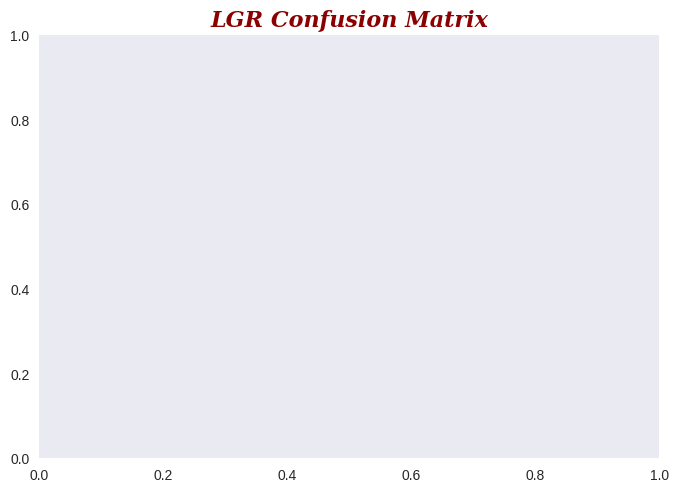

In [82]:
font1 = {'family': 'serif',
         'fontstyle' : 'italic',
         'fontsize' : 16,
         'fontweight' : 'bold',
         'color': 'DarkRed'}


plt.title('LGR Confusion Matrix', fontdict=font1)
plt.grid(False)
plt.show()



In [83]:
print("True Negatives:", 69349)
print("False Positives:", 1279)
print("False Negatives:", 4710)
print("True Positives:", 66289)

sensitivity = 0,9336610374794011
specificity = 0,9818910347171094
precision = 0.9810709211461036
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)


True Negatives: 69349
False Positives: 1279
False Negatives: 4710
True Positives: 66289

Sensitivity: (0, 9336610374794011)
Specificity: (0, 9818910347171094)
Precision: 0.9810709211461036


In [84]:
training_lgr_AUC = 0,9918803796502905
training_lgr_AUC = 0,9915963855793377

print("Training LGR AUC:",training_lgr_AUC)


Training LGR AUC: (0, 9915963855793377)
